In [1]:
#Import our dependencies
#=======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pickle
import seaborn as sns; sns.set(style ='white', color_codes = True)

In [2]:
pd.options.display.max_columns=None

In [3]:
#Pull in my csv
#====================================
df = pd.read_csv("college_stats.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'college_stats.csv'

In [ ]:
def CorrMtx(df, dropDuplicates = True):
    
    # Exclude duplicate correlations by masking uper right values
    
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool_)
        mask[np.triu_indices_from(mask)] = True
    
    # Set background color / chart style
    sns.set_style(style = 'white')
    
    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(16, 12))
    
    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df_stats, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

<AxesSubplot:>

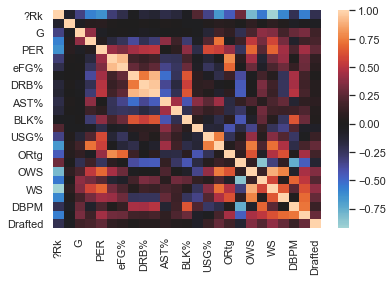

In [ ]:
#Creating a heat map to illustrate the features corrrelation to each other
sns.heatmap(df.corr(), center=0)

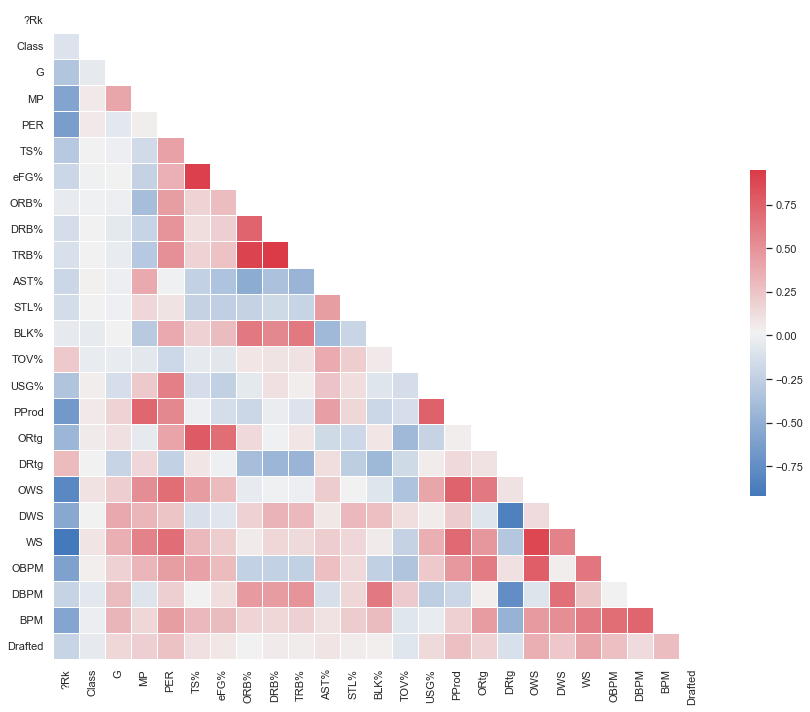

In [ ]:
CorrMtx(df.corr(), dropDuplicates=True)

In [ ]:
labels = ['Not Drafted', 'Drafted']

In [ ]:
#Naming my features which will be used for X later
#=================================================================================
features = df.drop(['Drafted','Player','Season','Pos','School','Conf'], axis = 1)
features

,?Rk,Class,G,MP,PER,TS%,eFG%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,PProd,ORtg,DRtg,OWS,DWS,WS,OBPM,DBPM,BPM
0,1,1,40,1281,35.1,0.654,0.628,11.6,25.6,19.0,7.5,2.5,13.7,8.6,18.8,550,139.0,80.7,5.9,4.1,9.9,7.8,10.8,18.7
1,2,4,39,1311,34.4,0.628,0.590,6.0,25.7,16.1,18.4,1.7,4.5,9.8,28.6,691,129.6,92.6,6.9,2.9,9.8,9.5,5.8,15.3
2,3,3,41,1543,29.9,0.543,0.478,3.9,11.5,7.9,28.0,3.1,0.5,9.5,32.4,930,121.2,98.9,7.3,2.4,9.7,10.2,2.7,12.9
3,4,3,37,1040,37.2,0.699,0.693,13.9,19.6,17.1,12.3,2.3,11.3,11.3,23.9,603,137.9,84.0,5.5,3.2,8.8,8.9,10.0,18.9
4,5,4,34,1002,34.8,0.657,0.602,9.2,18.6,13.8,30.7,4.1,1.8,11.0,25.7,623,137.9,86.8,5.8,2.9,8.7,9.3,4.7,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,9996,4,31,776,15.9,0.526,0.437,4.1,9.3,6.7,29.3,2.7,0.0,23.6,19.3,316,105.1,103.4,1.3,0.9,2.1,-2.2,-1.9,-4.1
5992,9997,3,31,717,15.0,0.486,0.479,4.5,15.2,9.9,11.9,3.3,1.1,8.9,16.6,201,105.6,97.0,1.0,1.2,2.1,0.5,1.5,2.1
5993,9998,4,28,905,12.6,0.548,0.500,1.9,11.1,6.7,22.2,1.9,0.6,22.8,17.5,290,104.5,105.1,1.0,1.1,2.1,-0.2,-0.3,-0.6
5994,9999,1,28,675,19.5,0.566,0.567,9.7,17.1,12.9,4.7,1.5,7.9,12.1,17.6,218,113.2,103.5,1.4,0.7,2.1,0.4,2.7,3.1


In [ ]:
#replace NAN values with 0

df= df.fillna(0)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    #Compute confusion matrix
    cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    #Show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    #Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# K Nearest Neighbor

In [ ]:
#Import libraries
#================================================
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Defining my variables
#======================
y = df['Drafted']
X = features

In [ ]:
#Train Test
#==========================================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

# Cross Validation

In [ ]:
knn_cv_score = cross_val_score(knn, X_train, y_train, cv=3)
mean_knn_cv_score = np.mean(knn_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_knn_cv_score * 100))

Mean Cross Validation Score: 97.96%


# Model Testing

In [ ]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
#Predict the response for new observations
#===============================================
test_preds = knn.predict(X_test)

In [ ]:
#Let's see how well did our model predict our correct class? 
accuracy_score(y_test, test_preds)

0.9924204143506822

In [ ]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)
print(f'\n{classification_report(y_test, test_preds)}')

Precision Score: 1.0
Recall Score: 0.5714285714285714
Accuracy Score: 0.9924204143506822
F1 Score: 0.7272727272727273

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1944
           1       1.00      0.57      0.73        35

    accuracy                           0.99      1979
   macro avg       1.00      0.79      0.86      1979
weighted avg       0.99      0.99      0.99      1979



Predicted     0   1   All
True                     
0          1944   0  1944
1            15  20    35
All        1959  20  1979


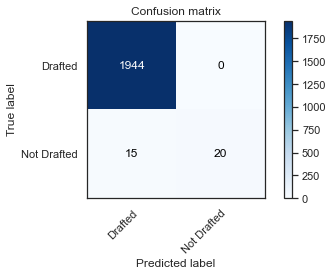

In [ ]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_preds, classes=labels,
                      title='Confusion matrix')

plt.show()


# Search Optimal Value Of K for KNN

In [ ]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [ ]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 13
F1-Score: 0.5970149253731343


In [ ]:
# search for an optimal value of K for KNN
k_range = list(range(1, 3))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.9833011963809075, 0.9822295587845391]


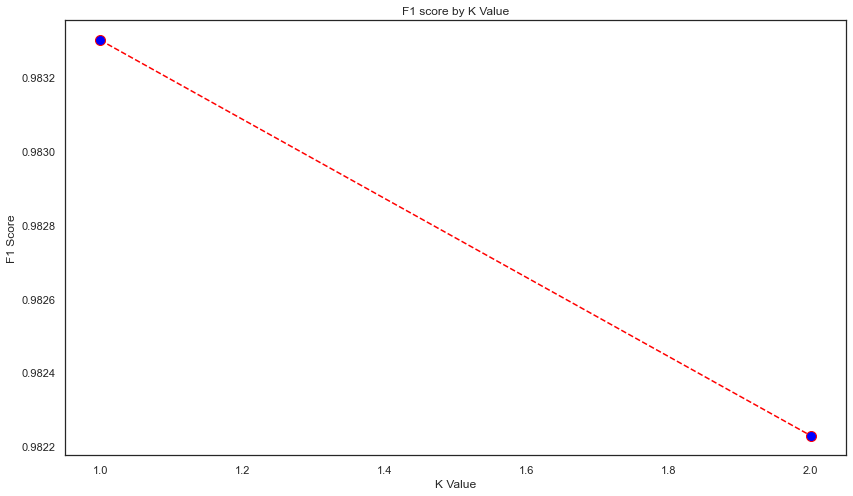

In [ ]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(14, 8))  
plt.plot(range(1, 3), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# Search Optimal Value Of K for KNN Standard Scalar

In [ ]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [ ]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  


model = KNeighborsClassifier(n_neighbors= 21)
model.fit(X_train_scaled, y_train)

test_pred_scaled = model.predict(X_test_scaled)

In [ ]:
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

Best Value for k: 7
F1-Score: 0.4814814814814815


In [ ]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_pred_scaled)
# print(confusion_matrix(y_test, test_pred_scaled, labels=None, sample_weight=None))
print(f'\n{classification_report(y_test, test_pred_scaled)}')

Precision Score: 0.7272727272727273
Recall Score: 0.22857142857142856
Accuracy Score: 0.9848408287013644
F1 Score: 0.34782608695652173

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1944
           1       0.73      0.23      0.35        35

    accuracy                           0.98      1979
   macro avg       0.86      0.61      0.67      1979
weighted avg       0.98      0.98      0.98      1979



Predicted     0   1   All
True                     
0          1944   0  1944
1            15  20    35
All        1959  20  1979


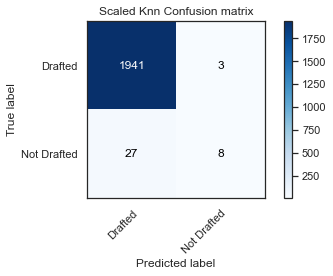

In [ ]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_pred_scaled, classes=labels,
                      title='Scaled Knn Confusion matrix')

plt.show()